In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("F:\\data\\usa.csv")

In [3]:
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [4]:
df.shape

(58, 18)

checking for null null values

In [5]:
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

by seeing the nan values we can conculde that  they are not missing values they are just representing  zeros  numerically
 so use fill na method 

In [6]:
df=df.fillna(0)

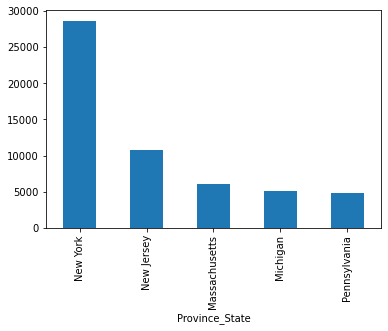

In [18]:
df.groupby('Province_State')['Deaths'].sum().sort_values(ascending=False).head().plot(kind='bar')

in america newyork have reported more death

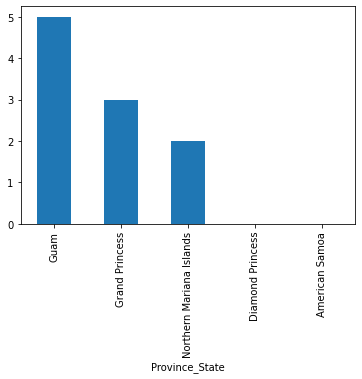

In [19]:
df.groupby('Province_State')['Deaths'].sum().sort_values(ascending=False).tail().plot(kind='bar')

in Us american Samoa,diamond Princess have reported  zero death

# Mortality rate

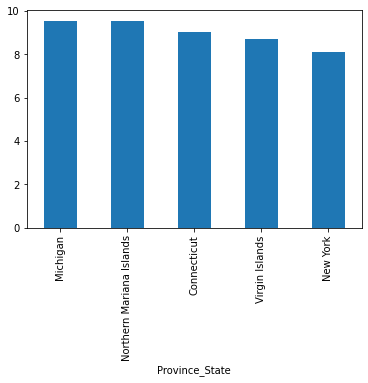

In [23]:
df.groupby('Province_State')['Mortality_Rate'].sum().sort_values(ascending=False).head().plot(kind='bar')

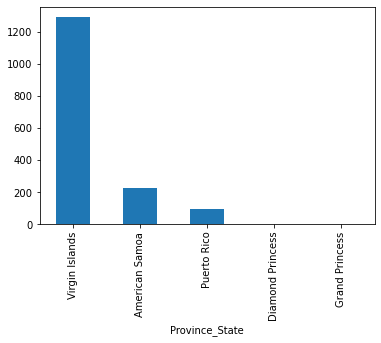

In [30]:
df.groupby('Province_State')['Testing_Rate'].sum().sort_values(ascending=False).tail().plot(kind='bar')

in Michgan ppl have  more  Mortality rate from this we could predict 

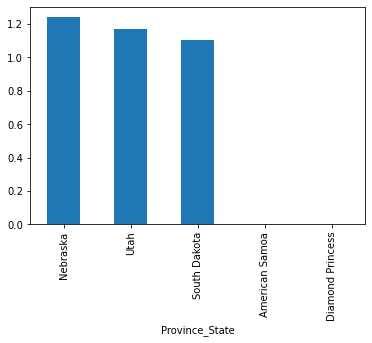

In [29]:
df.groupby('Province_State')['Mortality_Rate'].sum().sort_values(ascending=False).tail().plot(kind='bar')

# find out which province  have good testing rate 



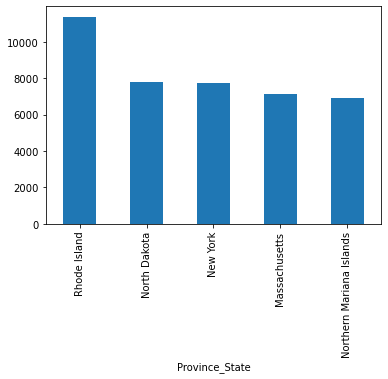

In [31]:
df.groupby('Province_State')['Testing_Rate'].sum().sort_values(ascending=False).head().plot(kind='bar')

most number of confirmed cases 

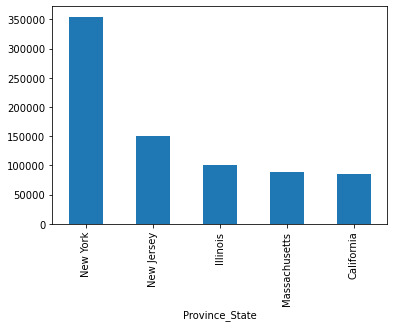

In [32]:
df.groupby('Province_State')['Confirmed'].sum().sort_values(ascending=False).head().plot(kind='bar')

lets find out recovary rate 

In [34]:
df['recovary_rate']=(df['Recovered']/df['Confirmed'])*100

In [35]:
df['recovary_rate']

0      0.000000
1     87.780549
2           NaN
3     25.311955
4     76.993804
5      0.000000
6     15.256393
7     16.054540
8     48.389065
9      0.000000
10    14.024632
11     0.000000
12     0.000000
13     0.000000
14    81.168831
15    89.891135
16    66.560255
17     0.000000
18     0.000000
19    53.533931
20     5.560127
21    34.602669
22    74.326084
23    60.472787
24     7.071805
25     0.000000
26    53.262654
27    69.196378
28    64.184842
29     0.000000
30    92.050209
31     0.000000
32     4.547916
33    32.962771
34    15.881175
35    29.792623
36    17.463668
37    57.432633
38    62.147971
39    61.904762
40     0.000000
41    77.114967
42    36.990266
43     0.000000
44     0.000000
45     7.711890
46    59.411444
47    72.372516
48    63.996307
49    58.717319
50    57.367056
51    87.288136
52    88.405797
53    13.744378
54     0.000000
55    60.625399
56    57.615746
57    67.090216
Name: recovary_rate, dtype: float64

In [37]:
df['recovary_rate']=df['recovary_rate'].fillna(0)

In [38]:
df.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
recovary_rate           0
dtype: int64

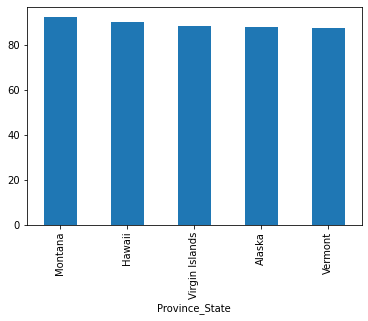

In [39]:
df.groupby('Province_State')['recovary_rate'].sum().sort_values(ascending=False).head().plot(kind='bar')

top five  province  which has good recovary rate

In [41]:
df['Country_Region'].unique()

array(['US'], dtype=object)

since  country region  column contain   single value so it will  not   have huge impact on predication 


In [43]:
df.drop(['Country_Region'],axis=1,inplace=True)

In [44]:
df['FIPS'].unique()

array([    1,     2,    60,     4,     5,     6,     8,     9,    10,
       88888,    11,    12,    13, 99999,    66,    15,    16,    17,
          18,    19,    20,    21,    22,    23,    24,    25,    26,
          27,    28,    29,    30,    31,    32,    33,    34,    35,
          36,    37,    38,    69,    39,    40,    41,    42,    72,
          44,    45,    46,    47,    48,    49,    50,    78,    51,
          53,    54,    55,    56], dtype=int64)

In [45]:
df.columns

Index(['Province_State', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'FIPS', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3', 'Testing_Rate',
       'Hospitalization_Rate', 'recovary_rate'],
      dtype='object')

In [47]:
df.drop(['Last_Update','Lat','Long_','FIPS','UID','ISO3'],axis=1,inplace=True)

In [48]:
df.head()

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate,recovary_rate
0,Alabama,13052,522,0.0,12530.0,266.194321,164450.0,1493.0,3.999387,3353.942386,11.438860,0.000000
1,Alaska,401,10,352.0,39.0,54.815493,37045.0,0.0,2.493766,5063.940017,0.000000,87.780549
2,American Samoa,0,0,0.0,0.0,0.000000,124.0,0.0,0.000000,222.857246,0.000000,0.000000
3,Arizona,14906,747,3773.0,10386.0,204.788838,165435.0,1792.0,5.011405,2272.859351,12.022005,25.311955
4,Arkansas,5003,107,3852.0,1044.0,165.782801,96258.0,535.0,2.138717,3189.670370,10.693584,76.993804


In [49]:
from sklearn.preprocessing  import LabelEncoder

In [50]:
lab=LabelEncoder()
df.loc[:,['Province_State']]=df.loc[:,['Province_State']].apply(lab.fit_transform)


In [51]:
df.head()

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate,recovary_rate
0,0,13052,522,0.0,12530.0,266.194321,164450.0,1493.0,3.999387,3353.942386,11.438860,0.000000
1,1,401,10,352.0,39.0,54.815493,37045.0,0.0,2.493766,5063.940017,0.000000,87.780549
2,2,0,0,0.0,0.0,0.000000,124.0,0.0,0.000000,222.857246,0.000000,0.000000
3,3,14906,747,3773.0,10386.0,204.788838,165435.0,1792.0,5.011405,2272.859351,12.022005,25.311955
4,4,5003,107,3852.0,1044.0,165.782801,96258.0,535.0,2.138717,3189.670370,10.693584,76.993804


# corelation  

In [53]:
import seaborn as sns 

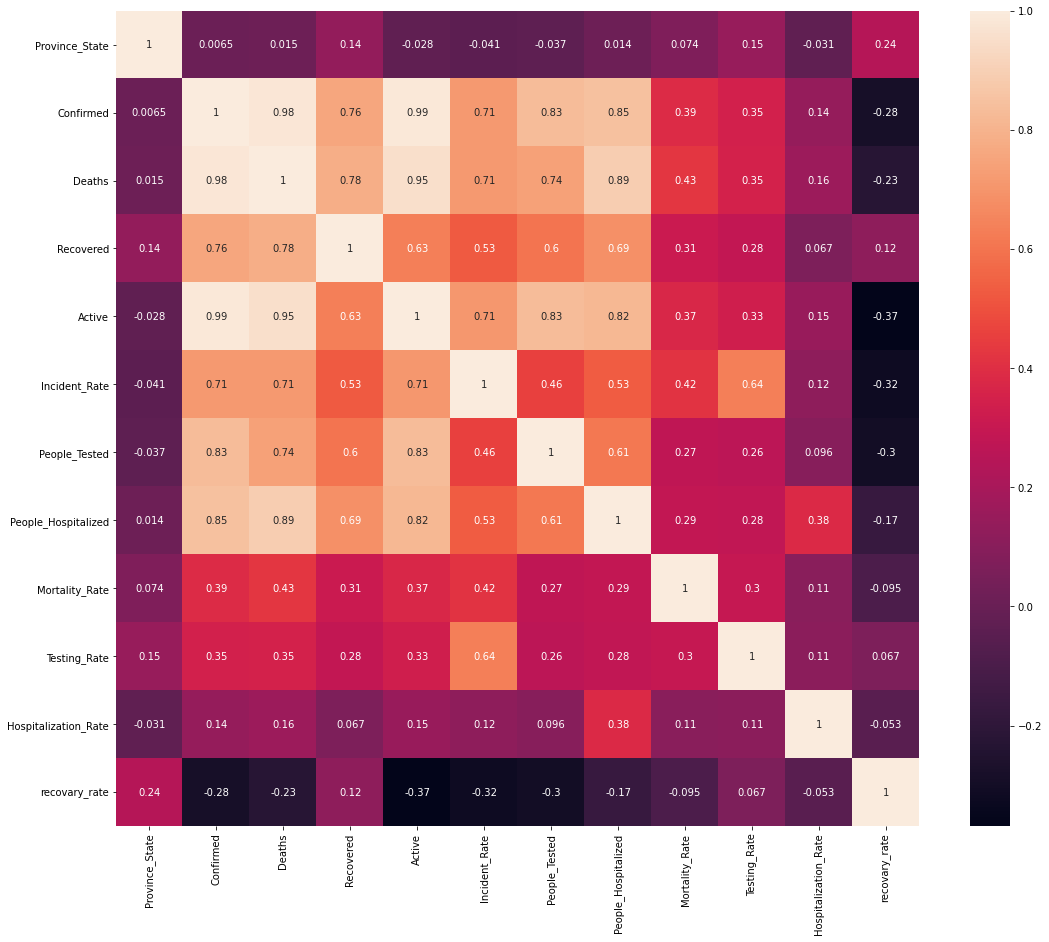

In [57]:
plt.rcParams['figure.figsize']=(18,15)
sns.heatmap(df.corr(),annot=True)

In [58]:
from sklearn.linear_model import LinearRegression


In [59]:
X=df.drop(['Deaths'],axis=1)
y=df['Deaths']

In [60]:
lin=LinearRegression()
lin.fit(X,y)

LinearRegression()

In [61]:
lin.score(X,y)

1.0

In [62]:
X_reg=df.drop(['Recovered'],axis=1)
y_reg=df['Recovered']

In [63]:
lin=LinearRegression()
lin.fit(X_reg,y_reg)

LinearRegression()

In [64]:
lin.score(X_reg,y_reg)

1.0